In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as py 


In [2]:
#Load the dataset
iris_data = pd.read_csv ("C://Users//Shweta Bhat//Downloads//Iris.csv")

In [3]:
#Get the quartile ranges of the data
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
#Check for missing values 
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
#Drop irrelevant columns
iris_data.drop(columns=['Id'] , inplace=True)

In [6]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
#Import the K-Means package to cluster our data 

from sklearn.cluster import KMeans

In [8]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Consider X as the set of independant variables ie the input 

X = iris_data.iloc[:,0:4] . values

In [10]:
#Import the Kmeans library 
from sklearn.cluster import KMeans


In [11]:
# Declare an array to store the Within-Cluster-Sum-of-Squares 
wcss=[]

In [12]:
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

In [13]:
wcss


[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.56163015873017,
 38.930963049671746,
 34.190687924796634,
 30.063874432733137,
 27.84235606060608,
 26.04820224804435]

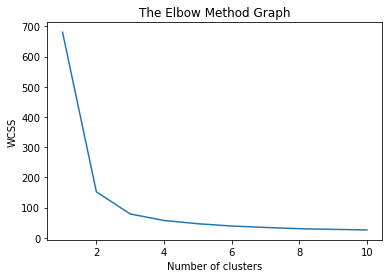

In [14]:
#4.Plot the elbow graph
py.plot(range(1,11),wcss)
py.title('The Elbow Method Graph')
py.xlabel('Number of clusters')
py.ylabel('WCSS')
py.show()

In [15]:
#5 According to the Elbow graph we deterrmine the clusters number as #3. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [16]:
y_kmeans = kmeans.fit_predict(X)

In [17]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [18]:
#Filter the data set by the labels
label_0 = iris_data[y_kmeans == 0]
label_1 = iris_data[y_kmeans == 1]
label_2 = iris_data[y_kmeans == 2]

In [20]:
cols = label_0.columns

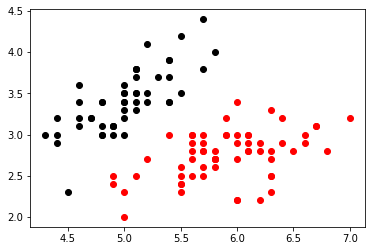

In [21]:
py.scatter(label_0[cols[0]], label_0[cols[1]], color = 'red')
py.scatter(label_1[cols[0]], label_1[cols[1]], color = 'black')
py.show()

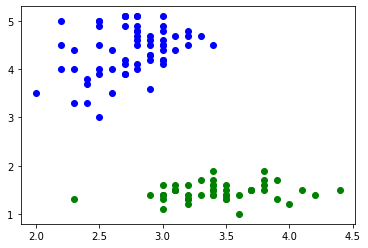

In [22]:
py.scatter(label_0[cols[1]] , label_0[cols[2]], color = 'blue')
py.scatter(label_1[cols[1]] , label_1[cols[2]], color = 'green')
py.show()